# Predicting heart disease using machine learning

This notebook looks into using various Python-based machine learning libraries in an attempt to make machine learning model capable of predecting wether or not someone has a heart disease based on their medical reports.

We are going to take the following approach
1. Problem definition
2. Data
3. Evaluation
4. Features
5. Modeling
6. Experimentation

## 1. Problem Definition

In a statement,
> Given medical status of a paitient can we predict if they have heart disease

## 2. Data

The orignal data came from the Cleavland data from the UCI Machine Learning Repository.

There is also a version of it on kaggel. https://www.kaggle.com/datasets/redwankarimsony/heart-disease-data

## 3.Evaluation

> If we can reach 95% accuracy at predicting wether or not a paitient has heart disease during the proof of concept we will persue the project

## 4. Features

This is the Place you will get different information about each of the features in your data.

** Create a dictionary **

1. id (Unique id for each patient)
2. age (Age of the patient in years)
3. origin (place of study)
4. sex (Male/Female)
5. cp chest pain type ([typical angina, atypical angina, non-anginal, asymptomatic])
6. trestbps resting blood pressure (resting blood pressure (in mm Hg on admission to the hospital))
7. chol (serum cholesterol in mg/dl)
8. fbs (if fasting blood sugar > 120 mg/dl)
9. restecg (resting electrocardiographic results)
10. -- Values: [normal, stt abnormality, lv hypertrophy]
11. thalach: maximum heart rate achieved
12. exang: exercise-induced angina (True/ False)
13. oldpeak: ST depression induced by exercise relative to rest
14. slope: the slope of the peak exercise ST segment
15. ca: number of major vessels (0-3) colored by fluoroscopy
16. thal: [normal; fixed defect; reversible defect]
17. num: the predicted attribute

1. id (Unique id for each patient)
2. age (Age of the patient in years)
3. origin (place of study)
4. sex (Male/Female)
5. cp chest pain type ([typical angina, atypical angina, non-anginal, asymptomatic])
6. trestbps resting blood pressure (resting blood pressure (in mm Hg on admission to the hospital))
7. chol (serum cholesterol in mg/dl)
8. fbs (if fasting blood sugar > 120 mg/dl)
9. restecg (resting electrocardiographic results)
10. -- Values: [normal, stt abnormality, lv hypertrophy]
11. thalach: maximum heart rate achieved
12. exang: exercise-induced angina (True/ False)
13. oldpeak: ST depression induced by exercise relative to rest
14. slope: the slope of the peak exercise ST segment
15. ca: number of major vessels (0-3) colored by fluoroscopy
16. thal: [normal; fixed defect; reversible defect]
17. num: the predicted attribute

## Preparing the tools 
we are going to use pandas matplotlib numpy for data analysis and manipulation

In [1]:
# Import all the tools we need 

# Regular EDA (exploratory data analysis) and ploting libraries
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

# Model from sklearn
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier

# Model Evaluations
from sklearn.model_selection import train_test_split , cross_val_score
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV
from sklearn.metrics import precision_score, recall_score, f1_score
from sklearn.metrics import plot_roc_curve

## Load Data

In [2]:
df = pd.read_csv("heart-disease.csv")
df.shape

(303, 14)

## Data Exploration (exploratory data analysis)

Explore the data and become a subject expert

1. What question are you trying to solve
2. What kind of data do we have and how do we treat different types
3. Whats missing from the data and how do you deal with it
4. Where are the outliers and why should you care for them?
5. How can you add change or remove features to get the most out

In [3]:
df.head()


,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [4]:
df.tail()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0
302,57,0,1,130,236,0,0,174,0,0.0,1,1,2,0


In [5]:
# Lets find out how many of each class are there
df["target"].value_counts()

1    165
0    138
Name: target, dtype: int64

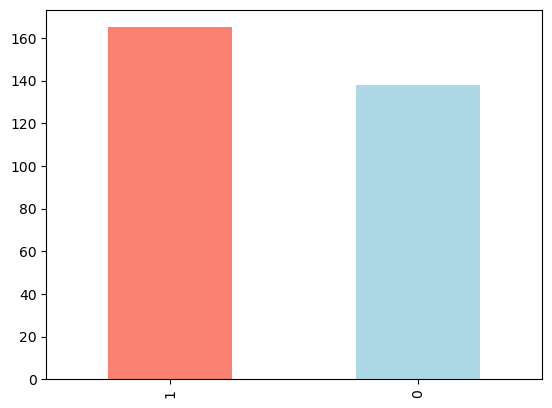

In [6]:
df["target"].value_counts().plot(kind="bar",color =["salmon","lightblue"]);

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [8]:
# Are there any missing values
df.isna().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

In [9]:
df.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


### Heart disease frequency according to sex

In [10]:
df.sex.value_counts()

1    207
0     96
Name: sex, dtype: int64

In [11]:
# Compare target column with sex column
pd.crosstab(df.target,df.sex)

sex,0,1
target,,
0,24,114
1,72,93


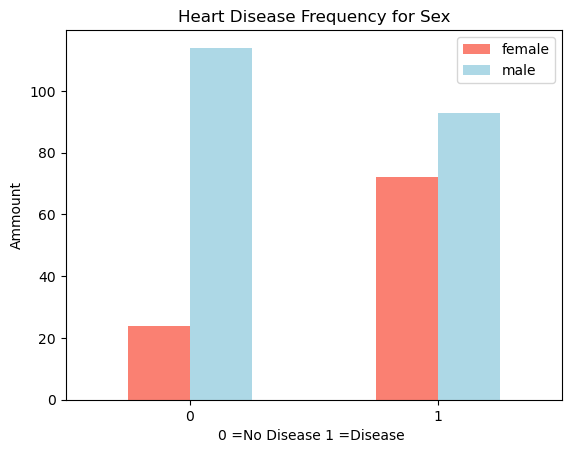

In [12]:
# Create a plot of crosstab
pd.crosstab(df.target,df.sex).plot(kind="bar",color = ["salmon","lightblue"]);
plt.title("Heart Disease Frequency for Sex")
plt.xlabel("0 =No Disease 1 =Disease ")
plt.ylabel("Ammount")
plt.legend(["female","male"])
plt.xticks(rotation =0)
plt.show()


In [13]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [14]:
df["thalach"].value_counts()

162    11
160     9
163     9
152     8
173     8
       ..
202     1
184     1
121     1
192     1
90      1
Name: thalach, Length: 91, dtype: int64

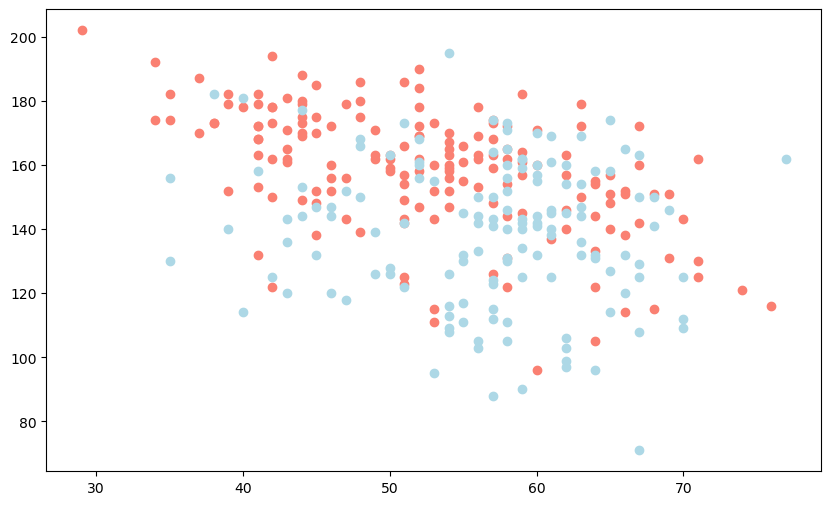

In [15]:
### Age Vs Max heart rate
plt.figure(figsize=(10,6))
#Heart disease
plt.scatter(df.age[df.target==1],
           df.thalach[df.target==1],c="salmon");
# No heart dissease
plt.scatter(df.age[df.target==0],
           df.thalach[df.target==0],c="lightblue");

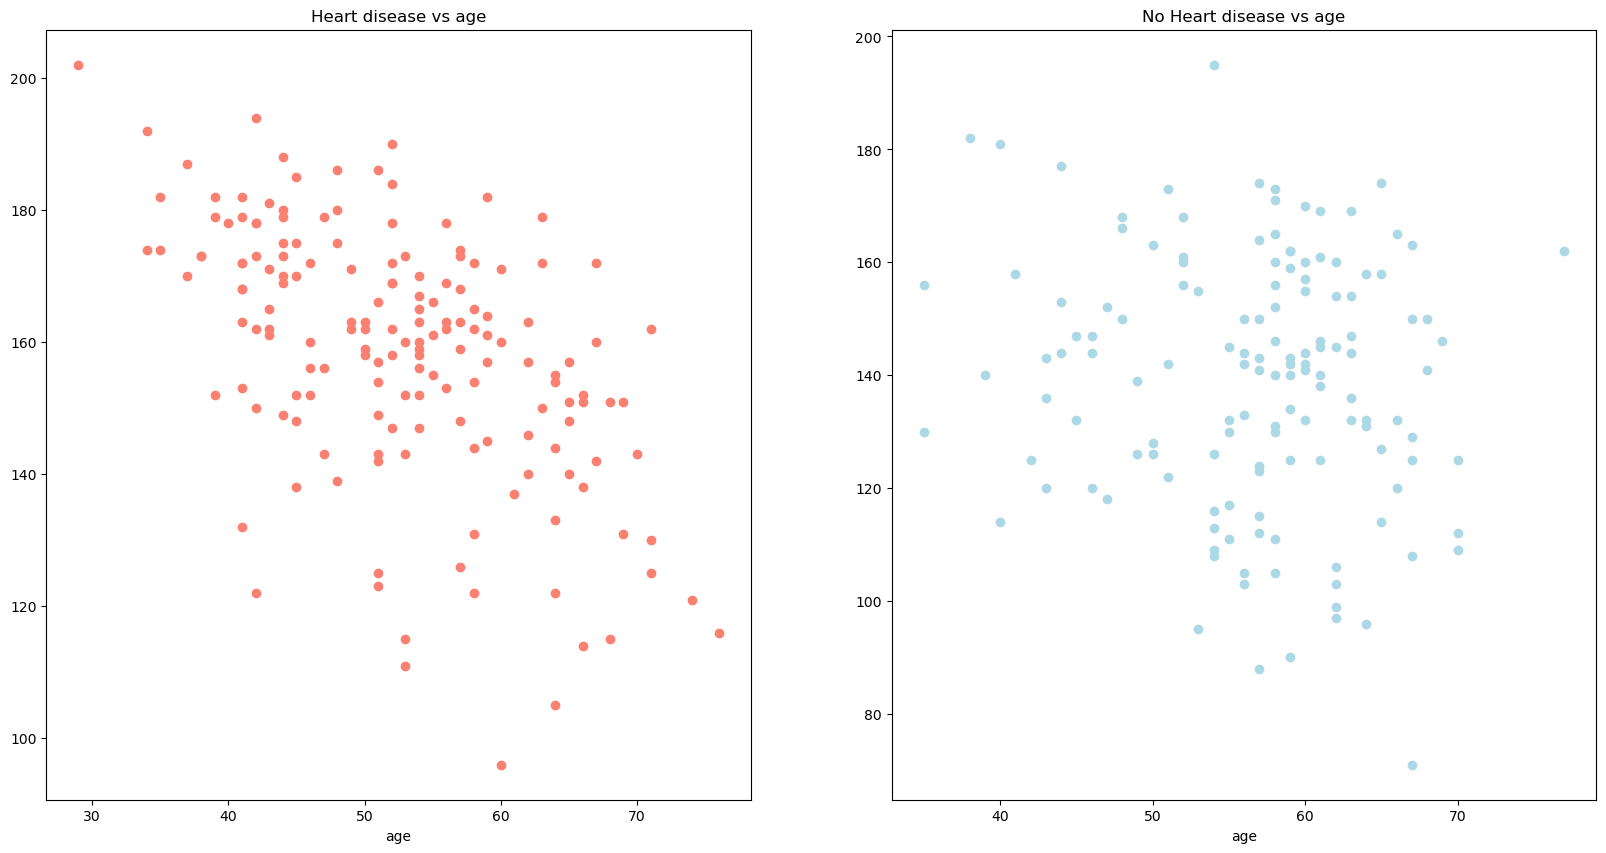

In [16]:
fig , (ax1,ax2) = plt.subplots(nrows=1,ncols=2,figsize=(20,10))
ax1.scatter(df.age[df.target==1],df.thalach[df.target==1],c="salmon")
ax2.scatter(df.age[df.target==0],df.thalach[df.target==0],c="lightblue")
ax1.set(title="Heart disease vs age",xlabel="age")
ax2.set(title="No Heart disease vs age",xlabel="age")
plt.show()


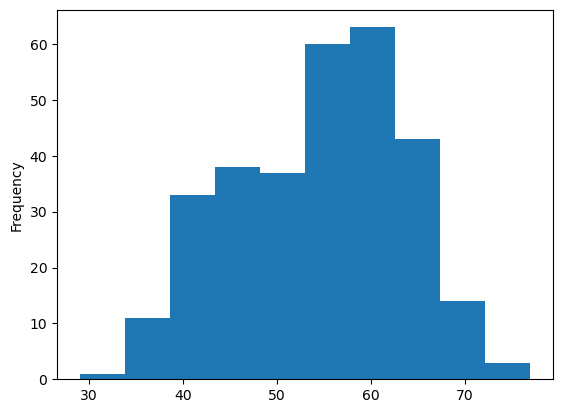

In [17]:
# Chech the distribution of the age column with a histogram
df.age.plot.hist();

No out liers 

In [18]:
# Chest pain VS Target(Heart Disease)
pd.crosstab(df.cp,df.target)
# 2 is no heart related thing for chest pain hmm!!

target,0,1
cp,,
0,104,39
1,9,41
2,18,69
3,7,16


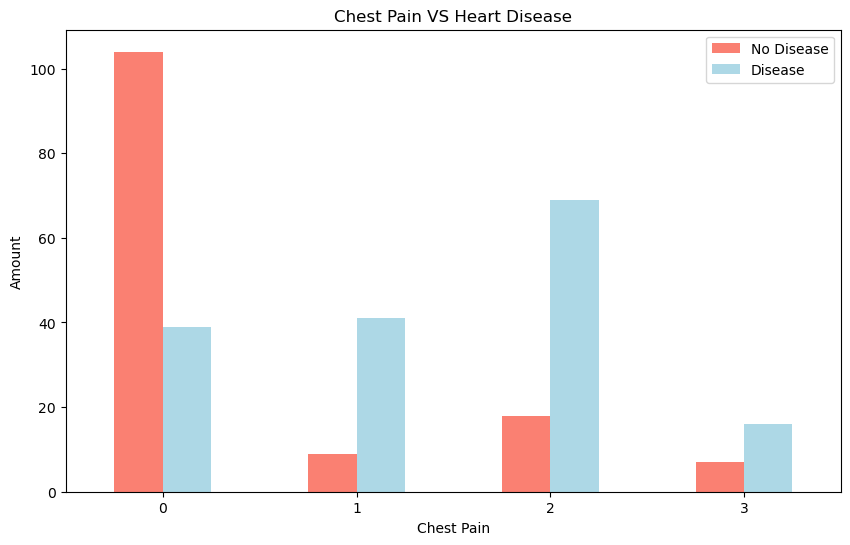

In [19]:
# Make the cross tab more vissual
pd.crosstab(df.cp,df.target).plot(kind="bar",figsize=(10,6),color=["salmon","lightblue"]);
plt.title("Chest Pain VS Heart Disease")
plt.xlabel("Chest Pain")
plt.ylabel("Amount")
plt.legend(["No Disease","Disease"])
plt.xticks(rotation=0);

In [20]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [21]:
# Make a correlation matrix
df.corr()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
age,1.000000,-0.098447,-0.068653,0.279351,0.213678,0.121308,-0.116211,-0.398522,0.096801,0.210013,-0.168814,0.276326,0.068001,-0.225439
sex,-0.098447,1.000000,-0.049353,-0.056769,-0.197912,0.045032,-0.058196,-0.044020,0.141664,0.096093,-0.030711,0.118261,0.210041,-0.280937
cp,-0.068653,-0.049353,1.000000,0.047608,-0.076904,0.094444,0.044421,0.295762,-0.394280,-0.149230,0.119717,-0.181053,-0.161736,0.433798
trestbps,0.279351,-0.056769,0.047608,1.000000,0.123174,0.177531,-0.114103,-0.046698,0.067616,0.193216,-0.121475,0.101389,0.062210,-0.144931
chol,0.213678,-0.197912,-0.076904,0.123174,1.000000,0.013294,-0.151040,-0.009940,0.067023,0.053952,-0.004038,0.070511,0.098803,-0.085239
fbs,0.121308,0.045032,0.094444,0.177531,0.013294,1.000000,-0.084189,-0.008567,0.025665,0.005747,-0.059894,0.137979,-0.032019,-0.028046
restecg,-0.116211,-0.058196,0.044421,-0.114103,-0.151040,-0.084189,1.000000,0.044123,-0.070733,-0.058770,0.093045,-0.072042,-0.011981,0.137230
thalach,-0.398522,-0.044020,0.295762,-0.046698,-0.009940,-0.008567,0.044123,1.000000,-0.378812,-0.344187,0.386784,-0.213177,-0.096439,0.421741
exang,0.096801,0.141664,-0.394280,0.067616,0.067023,0.025665,-0.070733,-0.378812,1.000000,0.288223,-0.257748,0.115739,0.206754,-0.436757
oldpeak,0.210013,0.096093,-0.149230,0.193216,0.053952,0.005747,-0.058770,-0.344187,0.288223,1.000000,-0.577537,0.222682,0.210244,-0.430696


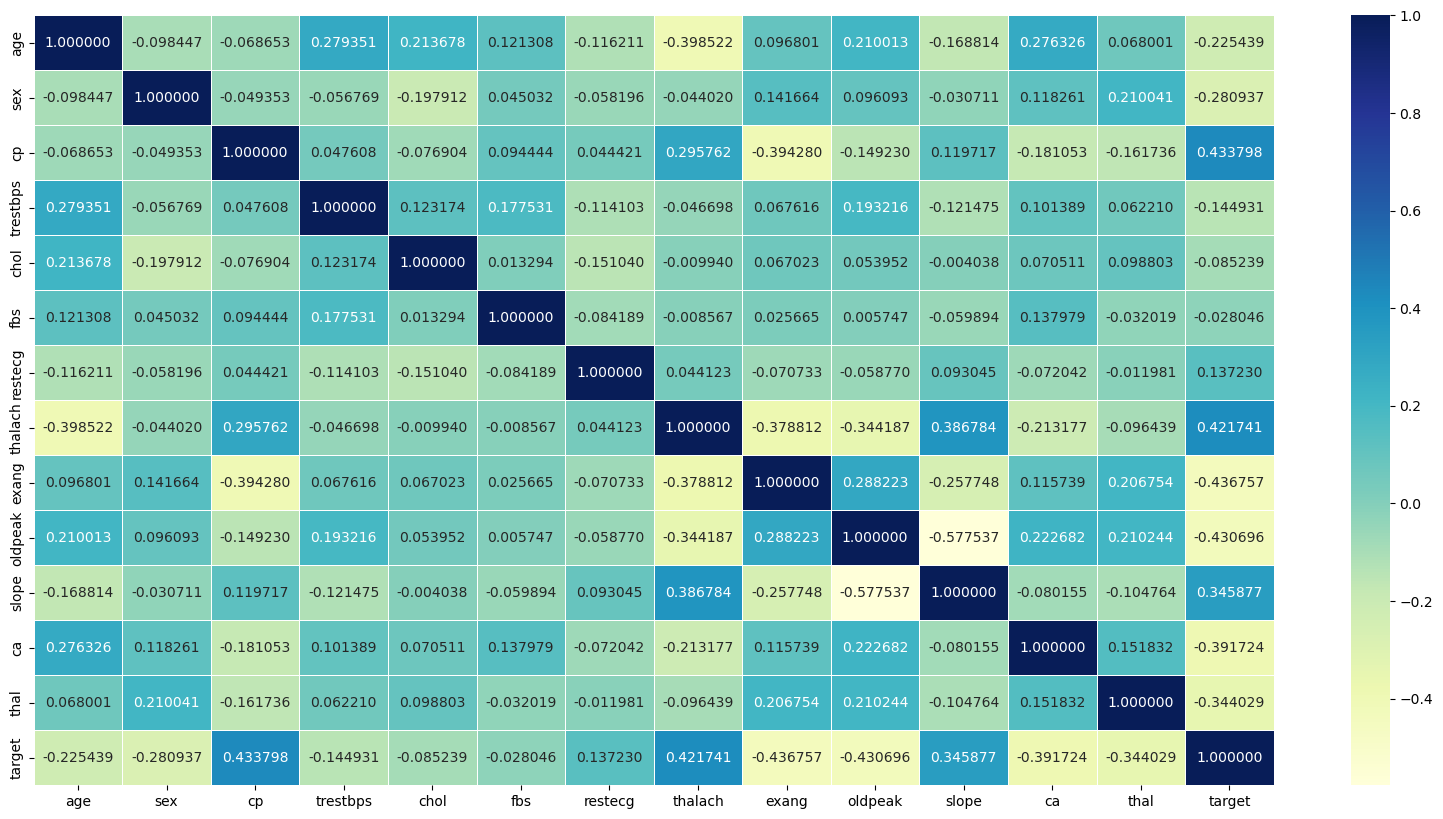

In [22]:
# lets make our correlation metrix more vissual
corr_matrix = df.corr()
fig,ax = plt.subplots(figsize=(20,10))
ax = sns.heatmap(corr_matrix,
                annot=True,
                linewidths=0.5,
                fmt ="2f",
                cmap="YlGnBu");

## 5.0 Modelling

In [23]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [24]:
# Split data into x and y
x = df.drop("target",axis=1)
y = df["target"]

In [25]:
x

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3


In [26]:

y

0      1
1      1
2      1
3      1
4      1
      ..
298    0
299    0
300    0
301    0
302    0
Name: target, Length: 303, dtype: int64

In [27]:
# Split data into train and test sets
np.random.seed(42)

# Split the data int train and test
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2)

In [28]:
y_train.shape

(242,)

In [29]:
x_test.shape

(61, 13)

We are going to try 3 ml models
1. Logistic Regression
2. K-nearest neaighbor
3. RandomForestClassifier

In [30]:
# Put models in a dictionary
models = {"Logistic Regression": LogisticRegression(max_iter=1000),
         "KNN": KNeighborsClassifier(),
         "Random Forest": RandomForestClassifier()}

# Create a function to fit and score models

def fit_and_score(models,x_train,x_test,y_train,y_test):
     
    """
    Fits and Evaluates the given machine learning models.
    models : a dict of different Scikit-Learn machine learning models
    x_train: training data no lables
    y_train: training lables
    x_test: testing data no lables
    y_test: testing lables
    """
    # Set Random Seed
    np.random.seed(42)
    
    # Make a dictionary for mdoel scores
    model_score = {}
    # Loop through Models
    for name,model in models.items():
        # Fit the model to the data
        model.fit(x_train,y_train)
        # Evaluate the model and append its score to model_score
        model_score[name]=model.score(x_test,y_test)
    return(model_score)


In [31]:
model_score = fit_and_score(models=models,
                           x_train=x_train,
                           x_test = x_test,
                           y_train = y_train,
                           y_test = y_test)
model_score

{'Logistic Regression': 0.8688524590163934,
 'KNN': 0.6885245901639344,
 'Random Forest': 0.8360655737704918}

### Model Comparison

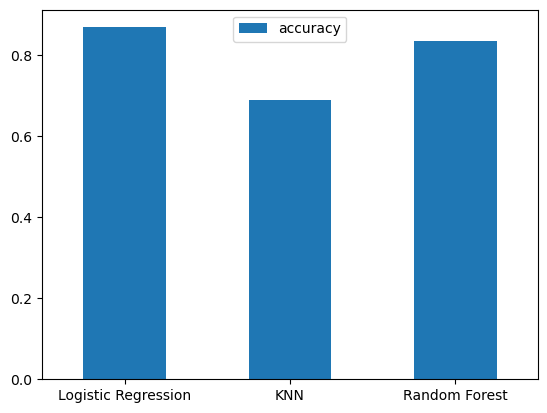

In [32]:
model_compare = pd.DataFrame(model_score, index=["accuracy"])
model_compare.T.plot.bar();
plt.xticks(rotation=0);

Now we have got a base line model and we know that models first predictions are not allwas the best so lets improve it

lets look at the following:

* Hyperprameter tuning
* Feature importance
* COnfusion Metrix
* Cross_validation
* Precission
* Recall
* F1 score
* Classification report
* ROC Curve
* Area under the curve (AUC)

## Hyperprameter tuning

In [33]:
 # Lets tune Knn
train_scores = []
test_scores =[]

neighbours =range (1,21)

knn =KNeighborsClassifier()
# loop through different neighbours
for i in neighbours:
    knn.set_params(n_neighbors=i)
    
    # Fit the algorithm
    knn.fit(x_train,y_train)
    
    # Update the training scores list 
    train_scores.append(knn.score(x_train,y_train))
    # Update the test scoe list
    test_scores.append(knn.score(x_test,y_test))

In [34]:
train_scores

[1.0,
 0.8099173553719008,
 0.7727272727272727,
 0.743801652892562,
 0.7603305785123967,
 0.7520661157024794,
 0.743801652892562,
 0.7231404958677686,
 0.71900826446281,
 0.6942148760330579,
 0.7272727272727273,
 0.6983471074380165,
 0.6900826446280992,
 0.6942148760330579,
 0.6859504132231405,
 0.6735537190082644,
 0.6859504132231405,
 0.6652892561983471,
 0.6818181818181818,
 0.6694214876033058]

Max Knn score on the test data :  75.40983606557377


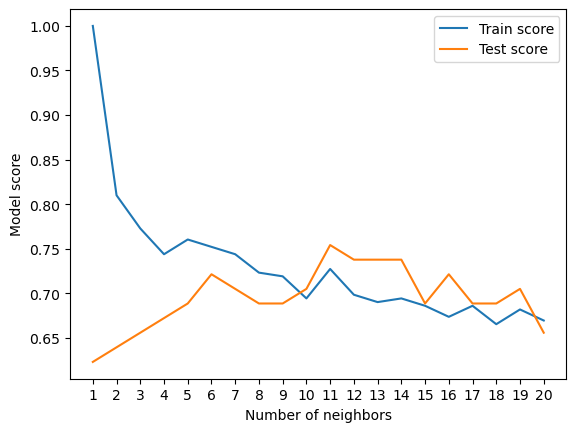

In [35]:
plt.plot(neighbours , train_scores , label="Train score");
plt.plot(neighbours , test_scores , label="Test score");
plt.xlabel("Number of neighbors")
plt.ylabel("Model score")
plt.legend()
plt.xticks(np.arange(1,21,1))
print ("Max Knn score on the test data : ", (max(test_scores)*100))

In [36]:
test_scores

[0.6229508196721312,
 0.639344262295082,
 0.6557377049180327,
 0.6721311475409836,
 0.6885245901639344,
 0.7213114754098361,
 0.7049180327868853,
 0.6885245901639344,
 0.6885245901639344,
 0.7049180327868853,
 0.7540983606557377,
 0.7377049180327869,
 0.7377049180327869,
 0.7377049180327869,
 0.6885245901639344,
 0.7213114754098361,
 0.6885245901639344,
 0.6885245901639344,
 0.7049180327868853,
 0.6557377049180327]

75% max efficiency of KNN 

## Hyperprameter tunning using Randomized Search CV

We are going to tune:
* LogisticRegression()
* RandomForestClassifier()

In [37]:
# Create a hyperprameter grid for logistic regression
log_reg_grid = {"C":np.logspace(-4,4,20),
               "solver": ["liblinear"]}
# Create a hyperprameter grid for Random Forest Classifier

rf_grid = {"n_estimators": np.arange(1,1000,50),
          "max_depth": [None,3,5,10],
          "min_samples_split": np.arange(2,20,2),
          "min_samples_leaf": np.arange(1,20,2)}

In [38]:
# Tune Logistic Regression

np.random.seed(42)

# Setup random hyperprameter search for lR
rs_log_reg = RandomizedSearchCV(LogisticRegression(),
                               param_distributions=log_reg_grid,
                               cv=5,
                               n_iter= 20,
                               verbose= True)

rs_log_reg.fit(x_train,y_train)

Fitting 5 folds for each of 20 candidates, totalling 100 fits


RandomizedSearchCV(cv=5, estimator=LogisticRegression(), n_iter=20,
                   param_distributions={'C': array([1.00000000e-04, 2.63665090e-04, 6.95192796e-04, 1.83298071e-03,
       4.83293024e-03, 1.27427499e-02, 3.35981829e-02, 8.85866790e-02,
       2.33572147e-01, 6.15848211e-01, 1.62377674e+00, 4.28133240e+00,
       1.12883789e+01, 2.97635144e+01, 7.84759970e+01, 2.06913808e+02,
       5.45559478e+02, 1.43844989e+03, 3.79269019e+03, 1.00000000e+04]),
                                        'solver': ['liblinear']},
                   verbose=True)

In [39]:
rs_log_reg.best_params_

{'solver': 'liblinear', 'C': 0.23357214690901212}

In [40]:
rs_log_reg.score(x_test,y_test)

0.8852459016393442

Now we tuned logistic regression lets do the same for random forest classifier

In [41]:
# Setup random seed
np.random.seed(42)

# Setup random hyperprameter search for Random Forest Classifier
rs_rf = RandomizedSearchCV(RandomForestClassifier(),
                               param_distributions=rf_grid,
                               cv=5,
                               n_iter= 20,
                               verbose= True)
rs_rf.fit(x_train,y_train)

Fitting 5 folds for each of 20 candidates, totalling 100 fits


RandomizedSearchCV(cv=5, estimator=RandomForestClassifier(), n_iter=20,
                   param_distributions={'max_depth': [None, 3, 5, 10],
                                        'min_samples_leaf': array([ 1,  3,  5,  7,  9, 11, 13, 15, 17, 19]),
                                        'min_samples_split': array([ 2,  4,  6,  8, 10, 12, 14, 16, 18]),
                                        'n_estimators': array([  1,  51, 101, 151, 201, 251, 301, 351, 401, 451, 501, 551, 601,
       651, 701, 751, 801, 851, 901, 951])},
                   verbose=True)

In [42]:
rs_rf.best_params_

{'n_estimators': 951,
 'min_samples_split': 4,
 'min_samples_leaf': 13,
 'max_depth': 3}

In [43]:
# Evaluate 
rs_rf.score(x_test,y_test)

0.8688524590163934

## Hyperprameter Tunning with grid search cv

Improvign Logistic Regression using grid search cv

In [44]:
# Create a hyperprameter grid for logistic regression
log_reg_grid = {"C":np.logspace(-4,4,30),
               "solver": ["liblinear"]}

# Setup random hyperprameter search for lR
gs_log_reg = GridSearchCV(LogisticRegression(),
                               param_grid=log_reg_grid,
                               cv=5,
                               verbose= True)
gs_log_reg.fit(x_train,y_train)

Fitting 5 folds for each of 30 candidates, totalling 150 fits


GridSearchCV(cv=5, estimator=LogisticRegression(),
             param_grid={'C': array([1.00000000e-04, 1.88739182e-04, 3.56224789e-04, 6.72335754e-04,
       1.26896100e-03, 2.39502662e-03, 4.52035366e-03, 8.53167852e-03,
       1.61026203e-02, 3.03919538e-02, 5.73615251e-02, 1.08263673e-01,
       2.04335972e-01, 3.85662042e-01, 7.27895384e-01, 1.37382380e+00,
       2.59294380e+00, 4.89390092e+00, 9.23670857e+00, 1.74332882e+01,
       3.29034456e+01, 6.21016942e+01, 1.17210230e+02, 2.21221629e+02,
       4.17531894e+02, 7.88046282e+02, 1.48735211e+03, 2.80721620e+03,
       5.29831691e+03, 1.00000000e+04]),
                         'solver': ['liblinear']},
             verbose=True)

In [45]:
gs_log_reg.best_params_

{'C': 0.20433597178569418, 'solver': 'liblinear'}

In [46]:
#Evaluate the model
gs_log_reg.score(x_test,y_test)

0.8852459016393442

In [47]:
## Evaluating our tuned machine learning classifier 
gs_log_reg.score(x_test,y_test)

0.8852459016393442

## Evaluating our tuned machine learning classifier 
* ROC curve and AUC score
* Confussion Metrix
* Precision
* Recall
* F1-score

and it would be great if cross-validation was used where possible


In [48]:
#To make comparrison we need to make predictions
y_preds = gs_log_reg.predict(x_test)

In [49]:
y_preds

array([0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0,
       0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0], dtype=int64)

In [50]:
y_test

179    0
228    0
111    1
246    0
60     1
      ..
249    0
104    1
300    0
193    0
184    0
Name: target, Length: 61, dtype: int64

D:\heart-disease-project\env\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metric.RocCurveDisplay.from_predictions` or :meth:`sklearn.metric.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)


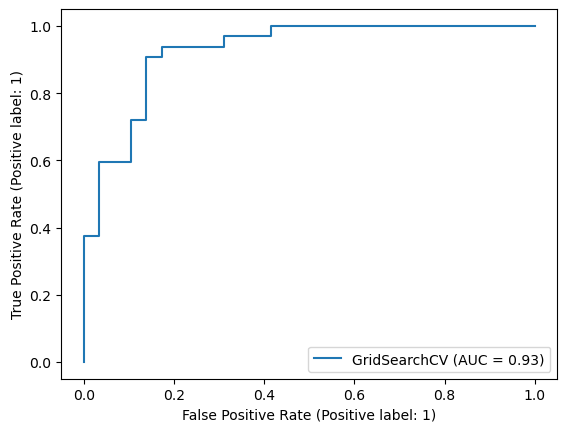

In [51]:
# Plot roc curve and calculate AUC metric
plot_roc_curve(gs_log_reg,x_test,y_test)

In [52]:
from sklearn.metrics import confusion_matrix
# Confusion metrix
print(confusion_matrix(y_test,y_preds))

[[25  4]
 [ 3 29]]


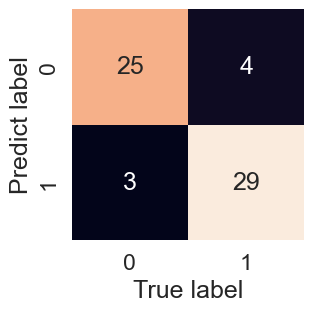

In [53]:
sns.set(font_scale=1.5)
def plot_conf_mat(y_test,y_preds):
    """
    Plots a nice looking confusion matrix
    """
    fig,ax = plt.subplots(figsize=(3,3))
    ax = sns.heatmap(confusion_matrix(y_test,y_preds),
                    annot=True,
                    cbar=False)
    plt.xlabel("True label")
    plt.ylabel("Predict label")
    
plot_conf_mat(y_test,y_preds)

Now we have ot a roc curve an Auc matrix lets get a classification report as well as cross validation precission recall and f1 score 

In [54]:
from sklearn.metrics import classification_report
print (classification_report(y_test,y_preds))

              precision    recall  f1-score   support

           0       0.89      0.86      0.88        29
           1       0.88      0.91      0.89        32

    accuracy                           0.89        61
   macro avg       0.89      0.88      0.88        61
weighted avg       0.89      0.89      0.89        61



### Calculate Evaluation metrix using cross validation

We are going to calculate precision,recall and f1-score of our model using cross-validation and to do so we will be using **cross_val_score()**.

In [55]:
# Check best hyperprameters
gs_log_reg.best_params_

{'C': 0.20433597178569418, 'solver': 'liblinear'}

In [56]:
# Create a new classifier with bestparameters
clf = LogisticRegression(C= 0.20433597178569418, solver= 'liblinear')


In [57]:
# Cross-validation accuracy
cv_acc = cross_val_score(clf,
                        x,
                        y,
                        cv=5,
                        scoring="accuracy")
cv_acc

array([0.81967213, 0.90163934, 0.8852459 , 0.88333333, 0.75      ])

In [58]:
cv_acc=np.mean(cv_acc)
cv_acc

0.8479781420765027

In [59]:
# Cross-validation precission
cv_precision = cross_val_score(clf,
                        x,
                        y,
                        cv=5,
                        scoring="precision")
cv_precision

array([0.775     , 0.88571429, 0.86111111, 0.86111111, 0.725     ])

In [60]:
cv_precision=np.mean(cv_precision)
cv_precision

0.8215873015873015

In [63]:
# Cross-validation recall

cv_recall = cross_val_score(clf,
                        x,
                        y,
                        cv=5,
                        scoring="recall")
cv_recall=np.mean(cv_recall)
cv_recall

0.9272727272727274

In [64]:
# Cross-validation f1-score

cv_f1score = cross_val_score(clf,
                        x,
                        y,
                        cv=5,
                        scoring="f1")
cv_f1score=np.mean(cv_f1score)
cv_f1score

0.8705403543192143

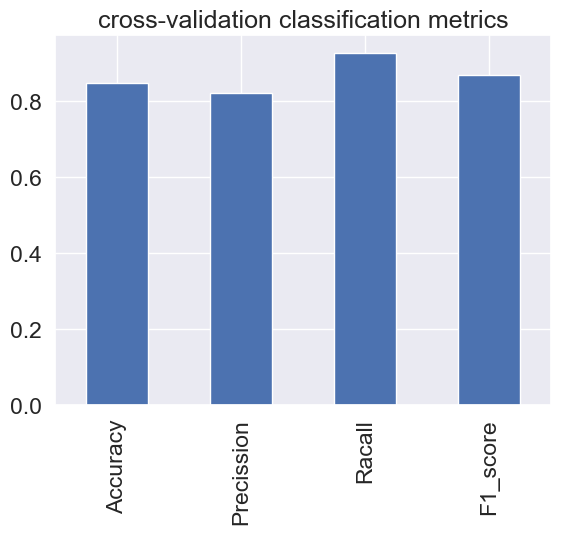

In [69]:
# Visuallize our cross validated metrix

cv_metrix = pd.DataFrame({"Accuracy":cv_acc,
                         "Precission":cv_precision,
                         "Racall":cv_recall,
                         "F1_score":cv_f1score},
                        index=[0])
cv_metrix.T.plot.bar(title="cross-validation classification metrics",
                           legend=False);

## Feature Importance
Feature importance is another as asking which featrue contributed most to the outcomes of the model and how did they contributed most to the outcomes of the model and how did they contributed most to the outcomes of the model and how did they contribute?
Finding feature importance is different for each machine learning model.
lets find the feature importance for our logistic regression model ...

In [71]:
# Fit an instance of logitic Regression
gs_log_reg.best_params_

{'C': 0.20433597178569418, 'solver': 'liblinear'}

In [72]:
clf = LogisticRegression(C= 0.20433597178569418, solver= 'liblinear')

In [73]:
clf.fit(x_train,y_train);

In [74]:
# Check coef
clf.coef_

array([[ 0.00316728, -0.86044635,  0.66067048, -0.01156993, -0.00166374,
         0.04386112,  0.31275834,  0.02459361, -0.60413071, -0.56862814,
         0.45051626, -0.63609889, -0.67663372]])

In [75]:
# Match coef of the features to the columns
feature_dict = dict(zip(df.columns,list(clf.coef_[0])))
feature_dict

{'age': 0.0031672782921965824,
 'sex': -0.8604463545603078,
 'cp': 0.6606704813545083,
 'trestbps': -0.011569931686524986,
 'chol': -0.001663743615316917,
 'fbs': 0.043861119186527575,
 'restecg': 0.3127583405809992,
 'thalach': 0.024593612169467042,
 'exang': -0.6041307069682633,
 'oldpeak': -0.5686281432757914,
 'slope': 0.45051625714744153,
 'ca': -0.6360988914321564,
 'thal': -0.6766337224000031}

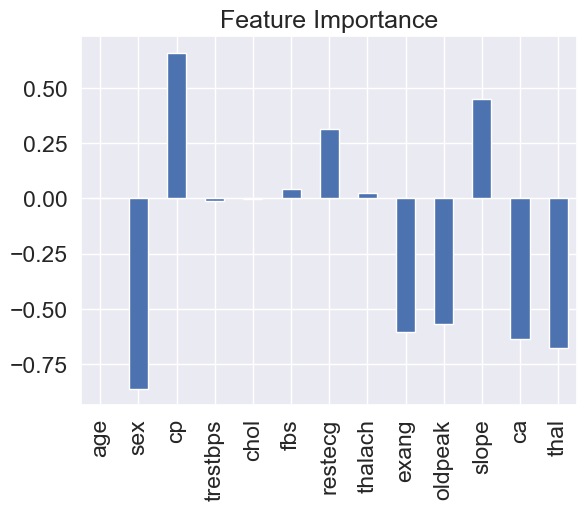

In [78]:
# Visualize feature importance
feature =pd.DataFrame(feature_dict,index=[0])
feature.T.plot.bar(title="Feature Importance",
                       legend=False);

In [80]:
pd.crosstab(df["sex"],df["target"])

target,0,1
sex,,
0,24,72
1,114,93


In [81]:
pd.crosstab(df["cp"],df["target"])

target,0,1
cp,,
0,104,39
1,9,41
2,18,69
3,7,16


## 6. Experimentation

* Collect more data.
* Try Better Model.
* CatBoost XGBoost

We have to get 95% accuracy

In [115]:
np.random.seed(42)
clf_hd = RandomForestClassifier(n_estimators=1000,
                                min_samples_leaf=1,
                                min_samples_split=
                               )
clf_hd.fit(x_train,y_train)
clf_hd.score(x_test,y_test)

0.8688524590163934

In [88]:
clf_hd.get_params()

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': 'sqrt',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_jobs': None,
 'oob_score': False,
 'random_state': None,
 'verbose': 0,
 'warm_start': False}

In [127]:
np.random.seed(42)
clf_lr = LogisticRegression(max_iter=100)
clf_lr.fit(x_train,y_train)
clf_lr.score(x_test,y_test)

D:\heart-disease-project\env\lib\site-packages\sklearn\linear_model\_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


0.8852459016393442

In [125]:
clf_lr.get_params()

{'C': 1.0,
 'class_weight': None,
 'dual': False,
 'fit_intercept': True,
 'intercept_scaling': 1,
 'l1_ratio': None,
 'max_iter': 110,
 'multi_class': 'auto',
 'n_jobs': None,
 'penalty': 'l2',
 'random_state': None,
 'solver': 'lbfgs',
 'tol': 0.0001,
 'verbose': 0,
 'warm_start': False}

In [128]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [143]:
df_mod = df.drop("chol",axis=1)

In [144]:
df_mod.head()

,age,sex,cp,trestbps,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,0,1,163,1,0.6,2,0,2,1


In [145]:
x=df_mod.drop("target",axis=1)
y=df["target"]
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2)

In [224]:
np.random.seed(42)
df_hd = RandomForestClassifier(n_estimators=100,
                               max_depth=4
                              )
df_hd.fit(x_train,y_train)
df_hd.score(x_test,y_test)

0.9016393442622951

In [195]:
# Create a hyperprameter grid for logistic regression
RF_grid = {"n_estimators":np.arange(1,1000,100),
               "max_depth": [1,2,3,4,5,6,7,8,9,10,None]}

# Setup random hyperprameter search for lR
RF_reg = GridSearchCV(RandomForestClassifier(),
                               param_grid=RF_grid,
                               cv=5,
                               verbose= True)
RF_reg.fit(x_train,y_train)

Fitting 5 folds for each of 110 candidates, totalling 550 fits


GridSearchCV(cv=5, estimator=RandomForestClassifier(),
             param_grid={'max_depth': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, None],
                         'n_estimators': array([  1, 101, 201, 301, 401, 501, 601, 701, 801, 901])},
             verbose=True)

In [215]:
RF_reg.best_params_

{'max_depth': 2, 'n_estimators': 401}

In [200]:
df_hd.get_params()

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': 4,
 'max_features': 'sqrt',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_jobs': None,
 'oob_score': False,
 'random_state': None,
 'verbose': 0,
 'warm_start': False}

In [201]:
y_preds=df_hd.predict(x_test)

In [202]:
classification_report(y_test,y_preds)

'              precision    recall  f1-score   support\n\n           0       0.90      0.90      0.90        29\n           1       0.91      0.91      0.91        32\n\n    accuracy                           0.90        61\n   macro avg       0.90      0.90      0.90        61\nweighted avg       0.90      0.90      0.90        61\n'

In [225]:
def evalu(clf,x,y,dict2):
    dict3={}
    for i in dict2:
        cv_recall = cross_val_score(clf,
                        x,
                        y,
                        cv=5,
                        scoring=i)
        cv_recall=np.mean(cv_recall)
        dict3[i]=cv_recall
        
    return(dict3)

In [226]:
dict2 = ["accuracy","recall","precision","f1"]
clf=df_hd

In [227]:
evalu(clf,x,y,dict2)

{'accuracy': 0.8381420765027323,
 'recall': 0.9090909090909092,
 'precision': 0.8233465880524704,
 'f1': 0.8563306655130146}

### Experimentation Continued